# **GRIP: The Sparks Foundations**
## **Data Science and Business Analystics Intern**
## ***Author : Ajay Wankhede***
## **Task 1 : Prediction using Supervised ML**



### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline




In [2]:
# Load data from url
data=pd.read_csv("http://bit.ly/w-data")

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking data type and any null value.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### **Correation Analysis**

In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


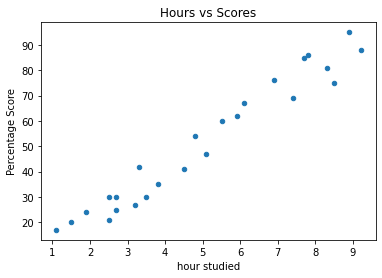

In [6]:
# Visualisation
data.plot(kind='scatter',x='Hours',y='Scores')
plt.title("Hours vs Scores")
plt.xlabel("hour studied")
plt.ylabel("Percentage Score")
plt.show()

In [7]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Hours', ylabel='Density'>

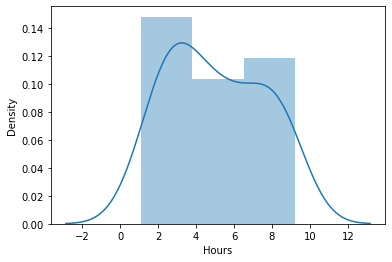

In [8]:
# Distribution plot hours 
sns.distplot(data['Hours'])

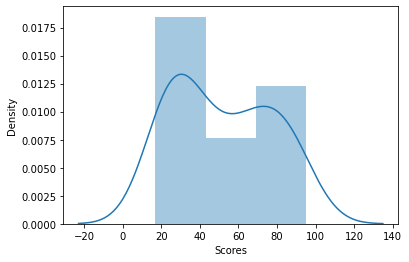

In [9]:
# Distribution plot Scores 
sns.distplot(data['Scores'])
plt.show()

### **Preparing the data and split**

In [10]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [11]:
#spliting data into train and test
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=50) 

### Training the Model

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

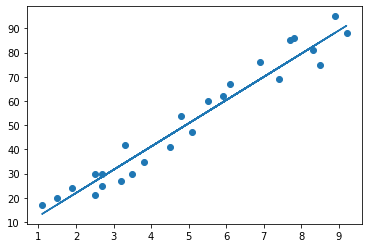

In [13]:
# Plotting the regression line
m=regressor.coef_
c=regressor.intercept_
line=m*X+c

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### **Model Predictions**

In [14]:
y_predict=regressor.predict(X_test)

In [15]:
# Comparing Target vs Predicted
Actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})  
Actual

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


**We will predict Percentage score if Student studied for 9.25 hr/day**

In [16]:
Hr=9.25
sr=regressor.predict([[Hr]])
print("\nIf student studied for {} hr/day,then he/she will score {} % marks in exam.".format(Hr,sr))


If student studied for 9.25 hr/day,then he/she will score [91.56986604] % marks in exam.


### **Model Evaluation**

In [17]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict)) 
print('R2 score:',r2_score(y_test,y_predict))     

Mean Absolute Error: 4.5916495300630285
R2 score: 0.971014141329942
